# Chapter 6: Arrangement and Production Thinking

## Learning Objectives

By the end of this chapter you will be able to:

1. Design an **arrangement timeline** -- which instruments play in which sections
2. Build **dynamic curves** that shape energy across a song
3. Plan **introductions and outros** that frame the song
4. Think about **frequency stacking** -- how instruments fill the sonic spectrum
5. Create effective **transitions** between song sections

---

## What Is Arrangement?

Writing a song gives you a melody, chords, rhythm, and lyrics. **Arrangement** is the art of deciding:

- **What instruments** play in each section
- **When** each instrument enters and exits
- **How loud** each part should be (dynamics)
- **What register** (high/low) each part occupies

The same song can feel like a whispered ballad or a wall of sound depending on arrangement. Think of arrangement as the **directing** of a song -- the song itself is the script.

```
Composition  = WHAT to play  (notes, chords, words)
Arrangement  = HOW to play   (instruments, dynamics, layers)
Production   = HOW it sounds (recording, mixing, effects)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from dataclasses import dataclass

@dataclass
class ArrangementEntry:
    """One instrument's presence in one section."""
    instrument: str
    section: str
    intensity: float    # 0.0 (silent) to 1.0 (full volume)
    role: str           # e.g., "lead", "rhythm", "pad", "accent"

# Define a full arrangement for a pop song
sections_order: list[str] = ["Intro", "Verse 1", "Chorus 1", "Verse 2", "Chorus 2", "Bridge", "Chorus 3", "Outro"]
instruments: list[str] = ["Vocals", "Acoustic Gtr", "Electric Gtr", "Bass", "Drums", "Keys/Synth", "Strings"]

# Arrangement matrix: intensity per instrument per section
# This encodes the artistic decisions about what plays when
arrangement: dict[str, dict[str, float]] = {
    "Intro":     {"Vocals": 0.0, "Acoustic Gtr": 0.5, "Electric Gtr": 0.0, "Bass": 0.0, "Drums": 0.0, "Keys/Synth": 0.3, "Strings": 0.0},
    "Verse 1":   {"Vocals": 0.6, "Acoustic Gtr": 0.6, "Electric Gtr": 0.0, "Bass": 0.4, "Drums": 0.3, "Keys/Synth": 0.2, "Strings": 0.0},
    "Chorus 1":  {"Vocals": 0.9, "Acoustic Gtr": 0.7, "Electric Gtr": 0.6, "Bass": 0.7, "Drums": 0.7, "Keys/Synth": 0.5, "Strings": 0.3},
    "Verse 2":   {"Vocals": 0.6, "Acoustic Gtr": 0.5, "Electric Gtr": 0.2, "Bass": 0.5, "Drums": 0.4, "Keys/Synth": 0.3, "Strings": 0.0},
    "Chorus 2":  {"Vocals": 1.0, "Acoustic Gtr": 0.7, "Electric Gtr": 0.8, "Bass": 0.8, "Drums": 0.8, "Keys/Synth": 0.6, "Strings": 0.5},
    "Bridge":    {"Vocals": 0.7, "Acoustic Gtr": 0.3, "Electric Gtr": 0.0, "Bass": 0.3, "Drums": 0.2, "Keys/Synth": 0.7, "Strings": 0.6},
    "Chorus 3":  {"Vocals": 1.0, "Acoustic Gtr": 0.8, "Electric Gtr": 1.0, "Bass": 1.0, "Drums": 1.0, "Keys/Synth": 0.7, "Strings": 0.8},
    "Outro":     {"Vocals": 0.3, "Acoustic Gtr": 0.4, "Electric Gtr": 0.2, "Bass": 0.3, "Drums": 0.2, "Keys/Synth": 0.3, "Strings": 0.2},
}

# Print the arrangement as a table
header = f"{'Instrument':<16}" + "".join(f"{s:<12}" for s in sections_order)
print("ARRANGEMENT MAP")
print("─" * len(header))
print(header)
print("─" * len(header))
for inst in instruments:
    row = f"{inst:<16}"
    for section in sections_order:
        val = arrangement[section][inst]
        if val == 0:
            symbol = "  ·"
        elif val < 0.4:
            symbol = "  ░"
        elif val < 0.7:
            symbol = "  ▓"
        else:
            symbol = "  █"
        row += f"{symbol:<12}"
    print(row)
print()
print("Legend:  · = silent  ░ = soft  ▓ = medium  █ = loud")

ARRANGEMENT MAP
────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Instrument      Intro       Verse 1     Chorus 1    Verse 2     Chorus 2    Bridge      Chorus 3    Outro       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Vocals            ·           ▓           █           ▓           █           █           █           ░         
Acoustic Gtr      ▓           ▓           █           ▓           █           ░           █           ▓         
Electric Gtr      ·           ·           ▓           ░           █           ·           █           ░         
Bass              ·           ▓           █           ▓           █           ░           █           ░         
Drums             ·           ░           █           ▓           █           ░           █           ░         
Keys/Synth        ░           ░           ▓           ░           ▓           █ 

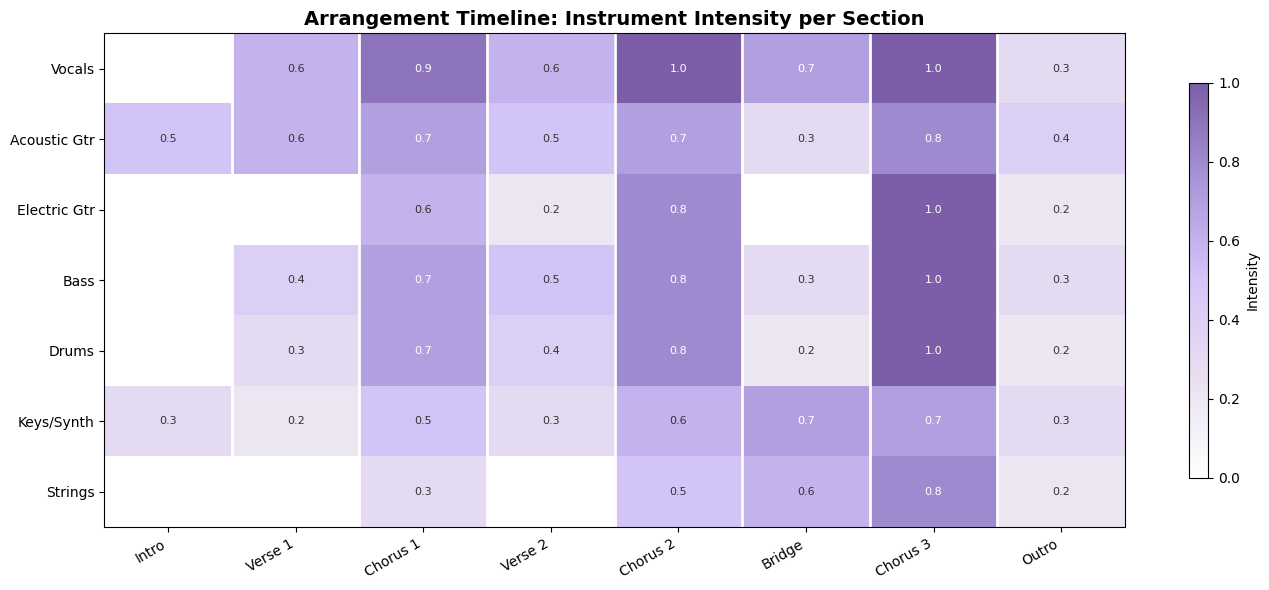

In [2]:
# Visualize the arrangement as a heatmap timeline

fig, ax = plt.subplots(figsize=(14, 6))

# Build the matrix
matrix = np.zeros((len(instruments), len(sections_order)))
for j, section in enumerate(sections_order):
    for i, inst in enumerate(instruments):
        matrix[i, j] = arrangement[section][inst]

# Custom colormap: white (0) to purple (1)
from matplotlib.colors import LinearSegmentedColormap
colors_list = ["#FFFFFF", "#E8E0F0", "#D4C5F9", "#AA96DA", "#7B5EA7"]
cmap = LinearSegmentedColormap.from_list("arrangement", colors_list)

im = ax.imshow(matrix, aspect="auto", cmap=cmap, vmin=0, vmax=1)

# Labels
ax.set_xticks(range(len(sections_order)))
ax.set_xticklabels(sections_order, rotation=30, ha="right", fontsize=10)
ax.set_yticks(range(len(instruments)))
ax.set_yticklabels(instruments, fontsize=10)

# Add intensity values in cells
for i in range(len(instruments)):
    for j in range(len(sections_order)):
        val = matrix[i, j]
        if val > 0:
            text_color = "white" if val > 0.6 else "#333333"
            ax.text(j, i, f"{val:.1f}", ha="center", va="center",
                   fontsize=8, color=text_color)

ax.set_title("Arrangement Timeline: Instrument Intensity per Section", fontsize=14, fontweight="bold")
fig.colorbar(im, ax=ax, label="Intensity", shrink=0.8)

# Section dividers
for j in range(len(sections_order) - 1):
    ax.axvline(x=j + 0.5, color="white", linewidth=2)

plt.tight_layout()
plt.show()

## The Dynamics Curve

**Dynamics** is the loudness/energy profile of a song over time. Most songs follow one of these shapes:

```
Ramp Up:     ╱───────   (builds throughout)
Arch:        ╱──╲        (peaks in middle)
Wave:        ╱╲╱╲╱╲     (verse-chorus energy cycling)
Plateau:     ╱─────╲    (quick build, sustain, quick fade)
```

The most common pop dynamic is the **ascending wave**: each chorus is slightly bigger than the last, with verses providing contrast.

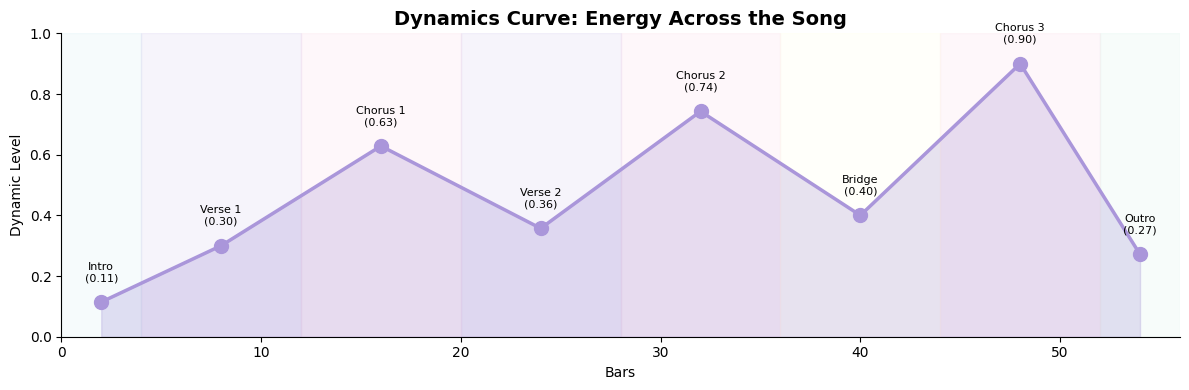

In [3]:
def compute_dynamics(arrangement: dict[str, dict[str, float]], 
                     sections: list[str]) -> list[float]:
    """Compute overall dynamic level per section.
    
    Dynamic level = sum of all instrument intensities, normalized.
    """
    levels = []
    max_possible = len(next(iter(arrangement.values())))  # num instruments
    for section in sections:
        total = sum(arrangement[section].values())
        levels.append(total / max_possible)
    return levels

dynamics = compute_dynamics(arrangement, sections_order)

# Section bar lengths (in bars) for x-axis scaling
section_bars: dict[str, int] = {
    "Intro": 4, "Verse 1": 8, "Chorus 1": 8, "Verse 2": 8,
    "Chorus 2": 8, "Bridge": 8, "Chorus 3": 8, "Outro": 4,
}

fig, ax = plt.subplots(figsize=(12, 4))

# Plot dynamics as a filled area chart with bar-proportional x-axis
x_positions = []
x = 0
for section in sections_order:
    x_positions.append(x + section_bars[section] / 2)  # midpoint
    x += section_bars[section]

ax.fill_between(x_positions, dynamics, alpha=0.3, color="#AA96DA")
ax.plot(x_positions, dynamics, "o-", color="#AA96DA", linewidth=2.5, markersize=10)

# Label each point
for xp, dyn, section in zip(x_positions, dynamics, sections_order):
    ax.annotate(f"{section}\n({dyn:.2f})", (xp, dyn),
               textcoords="offset points", xytext=(0, 15), ha="center", fontsize=8)

# Section background colors
section_colors = {
    "Intro": "#A8D8EA", "Verse 1": "#AA96DA", "Chorus 1": "#FCBAD3",
    "Verse 2": "#AA96DA", "Chorus 2": "#FCBAD3", "Bridge": "#FFFFD2",
    "Chorus 3": "#FCBAD3", "Outro": "#B5EAD7",
}
x = 0
for section in sections_order:
    bars = section_bars[section]
    ax.axvspan(x, x + bars, alpha=0.1, color=section_colors[section])
    x += bars

ax.set_xlim(0, sum(section_bars.values()))
ax.set_ylim(0, 1.0)
ax.set_xlabel("Bars")
ax.set_ylabel("Dynamic Level")
ax.set_title("Dynamics Curve: Energy Across the Song", fontsize=14, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Frequency Spectrum Stacking

Good arrangements avoid **frequency masking** -- where two instruments occupy the same frequency range and fight for space. Each instrument should own a region:

```
Frequency Range     Instruments
──────────────────────────────────────
Sub Bass (20-80 Hz)    Kick drum, bass synth
Bass (80-300 Hz)       Bass guitar, low piano
Low Mids (300-800 Hz)  Guitar body, male vocals
Mids (800-2kHz)        Vocals, guitar, keys
High Mids (2-5 kHz)    Vocal presence, guitar bite
Highs (5-12 kHz)       Hi-hat, cymbals, air
Air (12-20 kHz)        Sparkle, breath
```

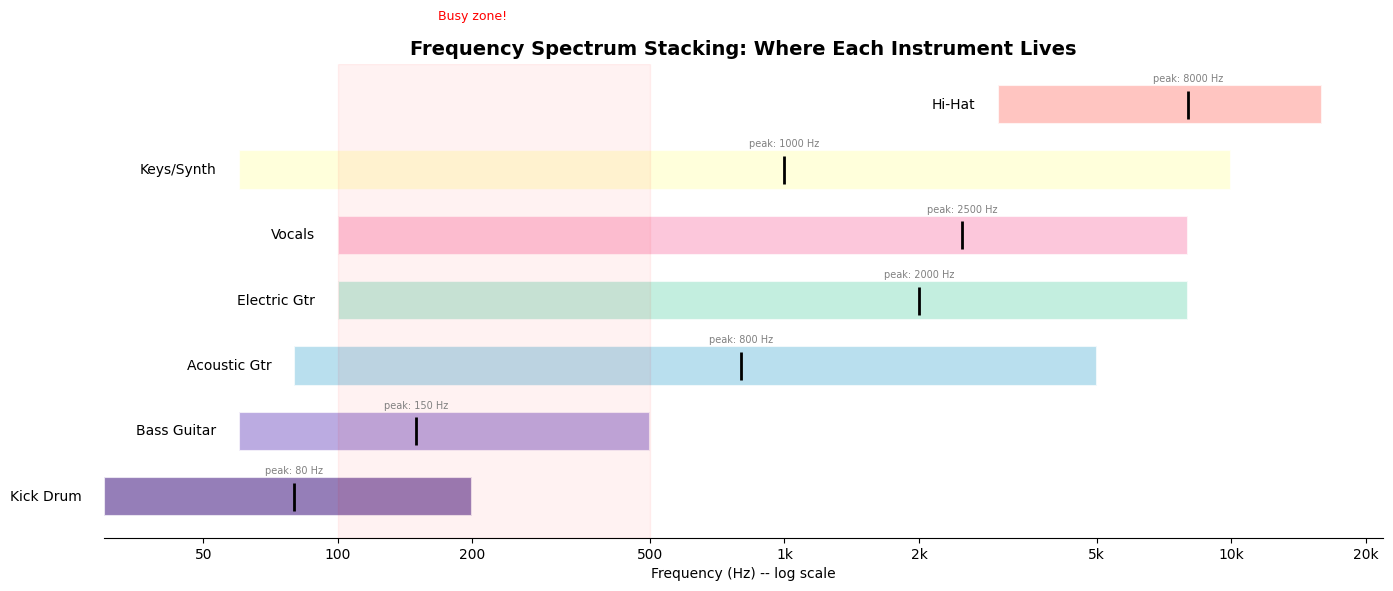

In [4]:
# Model each instrument's frequency footprint

@dataclass
class InstrumentSpectrum:
    name: str
    freq_low: float    # Hz, lower bound of primary range
    freq_high: float   # Hz, upper bound of primary range
    peak_freq: float   # Hz, where it's loudest
    color: str

spectra: list[InstrumentSpectrum] = [
    InstrumentSpectrum("Kick Drum",    30,   200,   80,  "#7B5EA7"),
    InstrumentSpectrum("Bass Guitar",  60,   500,  150,  "#AA96DA"),
    InstrumentSpectrum("Acoustic Gtr", 80,  5000,  800,  "#A8D8EA"),
    InstrumentSpectrum("Electric Gtr", 100,  8000, 2000,  "#B5EAD7"),
    InstrumentSpectrum("Vocals",       100,  8000, 2500,  "#FCBAD3"),
    InstrumentSpectrum("Keys/Synth",   60, 10000, 1000,  "#FFFFD2"),
    InstrumentSpectrum("Hi-Hat",      3000, 16000, 8000,  "#FFB7B2"),
]

fig, ax = plt.subplots(figsize=(14, 6))

# Plot each instrument as a horizontal band
for i, spec in enumerate(spectra):
    y = i
    # Main range bar
    ax.barh(y, np.log10(spec.freq_high) - np.log10(spec.freq_low),
            left=np.log10(spec.freq_low), height=0.6,
            color=spec.color, edgecolor="white", linewidth=1.5, alpha=0.8)
    # Peak marker
    ax.plot(np.log10(spec.peak_freq), y, "k|", markersize=20, markeredgewidth=2)
    # Label
    ax.text(np.log10(spec.freq_low) - 0.05, y, spec.name,
            ha="right", va="center", fontsize=10)
    ax.text(np.log10(spec.peak_freq), y + 0.35,
            f"peak: {spec.peak_freq} Hz", ha="center", fontsize=7, color="gray")

# Frequency axis labels
freq_ticks = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
freq_labels = ["20", "50", "100", "200", "500", "1k", "2k", "5k", "10k", "20k"]
ax.set_xticks([np.log10(f) for f in freq_ticks])
ax.set_xticklabels(freq_labels)
ax.set_xlabel("Frequency (Hz) -- log scale")
ax.set_yticks([])
ax.set_title("Frequency Spectrum Stacking: Where Each Instrument Lives", fontsize=14, fontweight="bold")

# Highlight overlap zones
ax.axvspan(np.log10(100), np.log10(500), alpha=0.05, color="red")
ax.text(np.log10(200), len(spectra) + 0.3, "Busy zone!", ha="center", fontsize=9, color="red")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.tight_layout()
plt.show()

## Transitions Between Sections

The moments **between** sections are where arrangement earns its keep. Good transitions create anticipation (before a chorus) or reset (after a chorus into a verse).

Common transition techniques:

| Technique | What It Does | Where To Use |
|-----------|-------------|-------------|
| **Drum fill** | Rhythmic flourish | Last bar before chorus |
| **Lift** | Everything drops out briefly | Right before chorus drops |
| **Riser** | Ascending sound (noise sweep) | Building into chorus |
| **Cymbal crash** | Punctuates the new section | Beat 1 of chorus |
| **Instrument add/remove** | Changes texture | Any transition |
| **Harmonic setup** | Dominant chord (V) | Last bar before resolution |

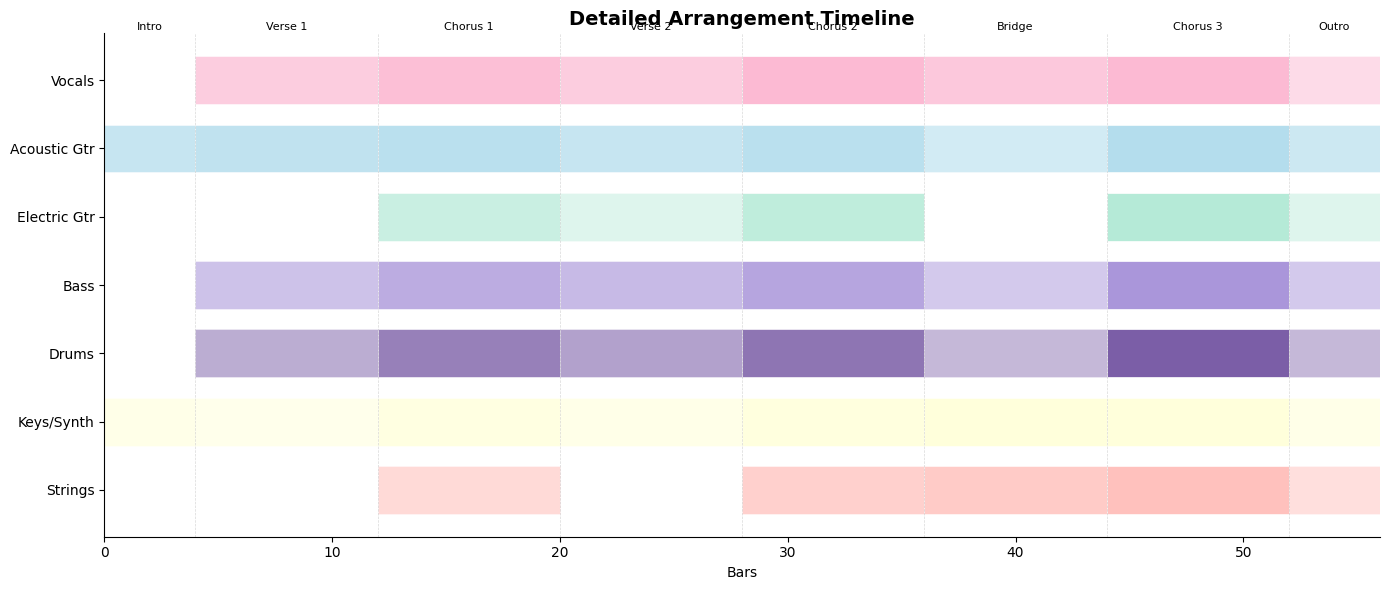

In [5]:
# Arrangement timeline builder
# A more detailed view showing instrument entry/exit points

def build_detailed_timeline(
    arrangement: dict[str, dict[str, float]],
    section_bars: dict[str, int],
    sections: list[str],
    instruments: list[str],
) -> dict[str, list[tuple[float, float, float]]]:
    """Build a timeline of (start_bar, end_bar, intensity) for each instrument."""
    timelines: dict[str, list[tuple[float, float, float]]] = {inst: [] for inst in instruments}
    
    bar_position = 0
    for section in sections:
        bars = section_bars[section]
        for inst in instruments:
            intensity = arrangement[section][inst]
            if intensity > 0:
                timelines[inst].append((bar_position, bar_position + bars, intensity))
        bar_position += bars
    
    return timelines

timelines = build_detailed_timeline(arrangement, section_bars, sections_order, instruments)

fig, ax = plt.subplots(figsize=(14, 6))

inst_colors = {
    "Vocals": "#FCBAD3", "Acoustic Gtr": "#A8D8EA", "Electric Gtr": "#B5EAD7",
    "Bass": "#AA96DA", "Drums": "#7B5EA7", "Keys/Synth": "#FFFFD2", "Strings": "#FFB7B2",
}

for i, inst in enumerate(instruments):
    y = len(instruments) - 1 - i  # top to bottom
    for start, end, intensity in timelines[inst]:
        alpha = 0.3 + intensity * 0.7  # min alpha 0.3
        ax.barh(y, end - start, left=start, height=0.7,
                color=inst_colors[inst], alpha=alpha, edgecolor="white", linewidth=0.5)

# Section labels at top
bar_pos = 0
for section in sections_order:
    bars = section_bars[section]
    ax.text(bar_pos + bars / 2, len(instruments) - 0.3, section,
            ha="center", va="bottom", fontsize=8, rotation=0)
    ax.axvline(x=bar_pos, color="gray", linewidth=0.5, alpha=0.3, linestyle="--")
    bar_pos += bars

ax.set_yticks(range(len(instruments)))
ax.set_yticklabels(list(reversed(instruments)), fontsize=10)
ax.set_xlabel("Bars")
ax.set_xlim(0, sum(section_bars.values()))
ax.set_title("Detailed Arrangement Timeline", fontsize=14, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Arrangement Archetypes

Let's compare arrangement philosophies across genres.

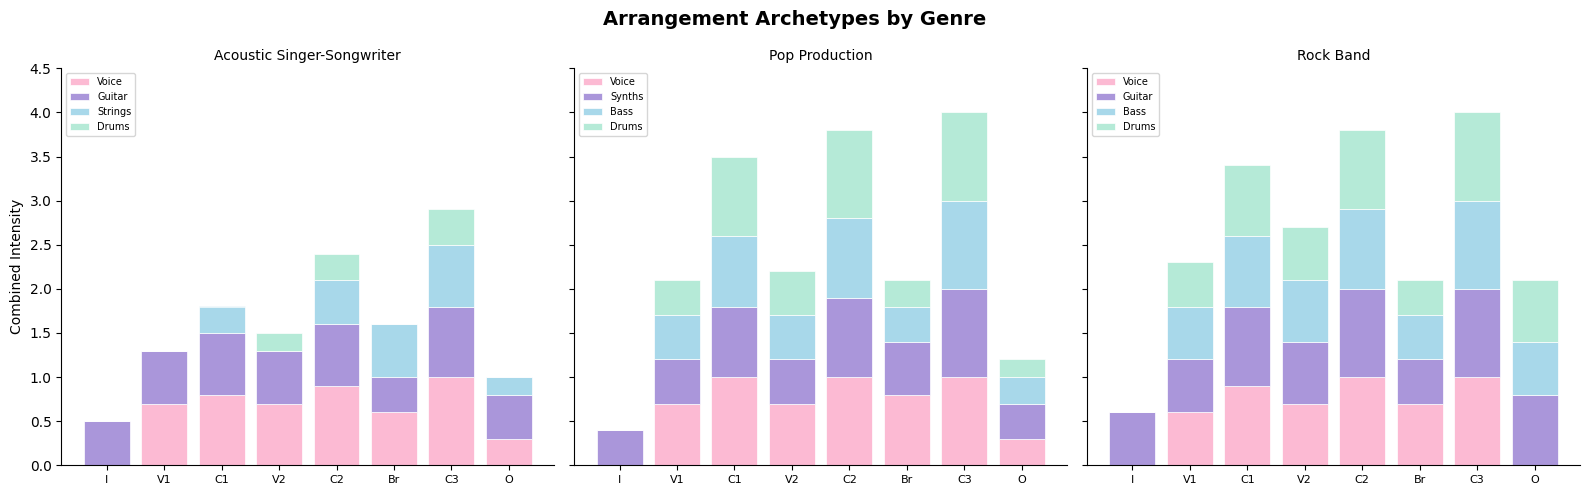

In [6]:
# Compare three genre archetypes

genre_arrangements: dict[str, dict[str, list[float]]] = {
    # Values: intensity across [Intro, V1, C1, V2, C2, Bridge, C3, Outro]
    "Acoustic Singer-Songwriter": {
        "Voice":    [0.0, 0.7, 0.8, 0.7, 0.9, 0.6, 1.0, 0.3],
        "Guitar":   [0.5, 0.6, 0.7, 0.6, 0.7, 0.4, 0.8, 0.5],
        "Strings":  [0.0, 0.0, 0.3, 0.0, 0.5, 0.6, 0.7, 0.2],
        "Drums":    [0.0, 0.0, 0.0, 0.2, 0.3, 0.0, 0.4, 0.0],
    },
    "Pop Production": {
        "Voice":    [0.0, 0.7, 1.0, 0.7, 1.0, 0.8, 1.0, 0.3],
        "Synths":   [0.4, 0.5, 0.8, 0.5, 0.9, 0.6, 1.0, 0.4],
        "Bass":     [0.0, 0.5, 0.8, 0.5, 0.9, 0.4, 1.0, 0.3],
        "Drums":    [0.0, 0.4, 0.9, 0.5, 1.0, 0.3, 1.0, 0.2],
    },
    "Rock Band": {
        "Voice":    [0.0, 0.6, 0.9, 0.7, 1.0, 0.7, 1.0, 0.0],
        "Guitar":   [0.6, 0.6, 0.9, 0.7, 1.0, 0.5, 1.0, 0.8],
        "Bass":     [0.0, 0.6, 0.8, 0.7, 0.9, 0.5, 1.0, 0.6],
        "Drums":    [0.0, 0.5, 0.8, 0.6, 0.9, 0.4, 1.0, 0.7],
    },
}

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle("Arrangement Archetypes by Genre", fontsize=14, fontweight="bold")

section_labels = ["I", "V1", "C1", "V2", "C2", "Br", "C3", "O"]
genre_colors = ["#FCBAD3", "#AA96DA", "#A8D8EA", "#B5EAD7"]

for ax, (genre, inst_data) in zip(axes, genre_arrangements.items()):
    x = np.arange(8)
    bottom = np.zeros(8)
    
    for (inst, values), color in zip(inst_data.items(), genre_colors):
        ax.bar(x, values, bottom=bottom, label=inst, color=color,
               edgecolor="white", linewidth=0.5)
        bottom += np.array(values)
    
    ax.set_xticks(x)
    ax.set_xticklabels(section_labels, fontsize=8)
    ax.set_title(genre, fontsize=10)
    ax.set_ylim(0, 4.5)
    ax.legend(fontsize=7, loc="upper left")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Combined Intensity")
plt.tight_layout()
plt.show()

## Key Arrangement Principles

1. **Start sparse, end full.** The final chorus should have the most elements.
2. **Contrast between sections.** If the chorus is loud and full, the verse should be quieter and thinner.
3. **Each instrument needs its own space** -- in frequency, in rhythm, or in stereo position.
4. **The bridge should sound different** from everything else. That is its job.
5. **Silence is an instrument.** What you leave out defines the arrangement as much as what you put in.

## Exercises

1. **Design an arrangement**: Choose a song form from Chapter 1 and create an arrangement dictionary for it. Which instruments enter when?
2. **Dynamic curve**: Plot the dynamics curve for your arrangement. Does it have a clear climax?
3. **Genre swap**: Take the pop arrangement above and rearrange it for a folk style (remove drums and synths, add fiddle and banjo). How does the dynamics curve change?
4. **Frequency audit**: List the instruments in your arrangement and check for frequency overlap using the spectrum chart.

---

## What's Next

You now have all the tools. In **Chapter 7: Capstone**, you will combine everything -- structure, melody, harmony, rhythm, lyrics, and arrangement -- to generate a complete song from scratch using Python.